In [1]:
import math
import torch
import hess
import hess.utils as utils
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
fpath = "../saved-experiments/"

fname = "losses.pt"
losses = torch.load(fpath + fname, map_location="cpu")

fname = "final_eigs.P"
with open(fpath + fname, 'rb') as fp:
    final_eigs = pickle.load(fp)

fname = "init_eigs.P"
with open(fpath + fname, 'rb') as fp:
    init_eigs = pickle.load(fp)


In [3]:
idx = losses[:, 0].argsort()
init_loss = losses[idx, 0]

In [4]:
n_trial = losses.shape[0]

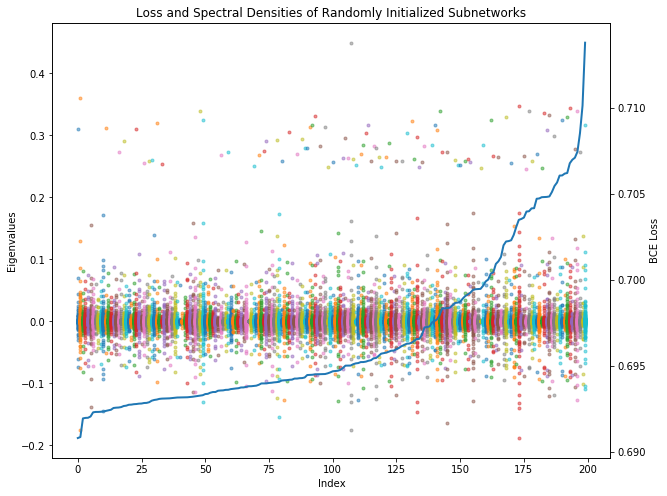

In [11]:
fig, ax1 = plt.subplots(figsize=(10,8))
# ax2 = ax1.twinx()
for ii, tt in enumerate(idx):
    x_plt = np.ones_like(init_eigs[tt]) * ii
    ax1.plot(x_plt, init_eigs[tt],
            marker=".", alpha=0.5, linestyle='None')
ax1.set_ylabel("Eigenvalues")

ax2 = ax1.twinx()
ax2.plot(torch.arange(n_trial), init_loss.detach(),
        linewidth=2.)
ax2.set_ylabel("BCE Loss")
ax1.set_xlabel("Index")
plt.title("Loss and Spectral Densities of Randomly Initialized Subnetworks");

## Let's compute Effective Dimension of Initial Networks ##